<a href="https://colab.research.google.com/github/Hereneak/-Python-/blob/main/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%BF%D0%BE_%D0%BF%D1%80%D0%BE%D1%84%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%D0%98%D0%B3%D1%80%D0%BE%D0%B2%D0%BE%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime
from datetime import time
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

## Платящий

In [ ]:
# epw1 = pd.read_excel('f:\\Netology\\itogovaya\\Empires___Puzzles_Whale.xlsx')
epw1 = pd.read_csv('f:\\Netology\\itogovaya\\Empires & Puzzles Whale.csv')
epw1.columns = epw1.columns.str.lower()

In [ ]:
# дублткаты
epw1.duplicated().sum()

169

In [ ]:
# пропуски
# (epw1.isna().mean()*100).round(2)

In [ ]:
#убираем дубликаты,заменяем пропуски
epw = epw1.drop_duplicates().reset_index(drop=True).fillna(' ')
epw.duplicated().sum()

0

<AxesSubplot:>

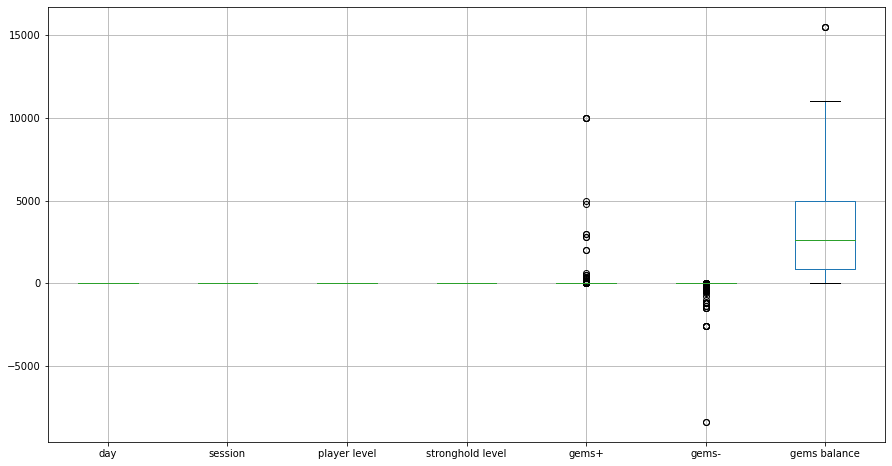

In [ ]:
#выбросы
epw.boxplot()

In [ ]:
epw['date'] = pd.to_datetime(epw['date'])
epw['videolength'] = pd.to_timedelta(epw['videolength']).dt.total_seconds()

## Неплатящий

In [ ]:
# epnp1 = pd.read_excel('f:\\Netology\\itogovaya\\Empires___Puzzles_Non-Paying.xlsx')
epnp1 = pd.read_csv('f:\\Netology\\itogovaya\\Empires & Puzzles Non-Paying.csv')
epnp1.columns = epnp1.columns.str.lower()

In [ ]:
#дубликаты
epnp1.duplicated().sum()

49

In [ ]:
#пропуски
# (epnp1.isna().mean()*100).round(2)

In [ ]:
#убираем дубликаты,заменяем пропуски
epnp = epnp1.drop_duplicates().reset_index(drop=True).fillna(' ')
epnp.duplicated().sum()

0

In [ ]:
# (epnp2.isna().mean()*100).round(2)

<AxesSubplot:>

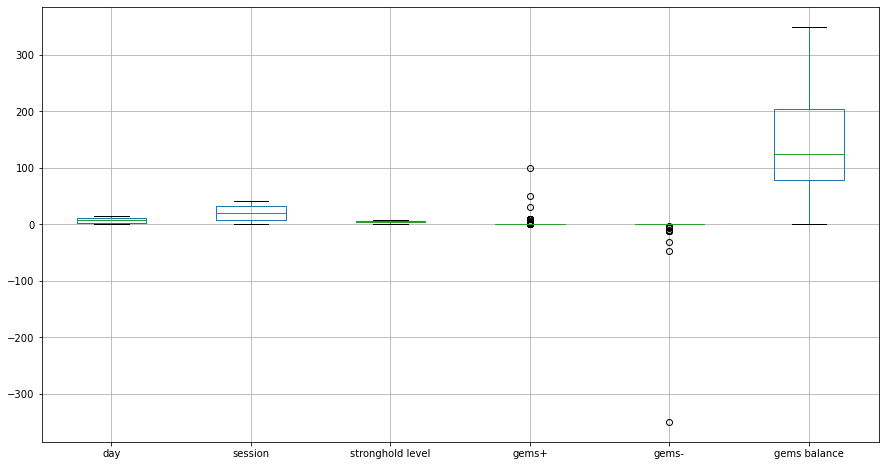

In [ ]:
#выбросы
epnp.boxplot()

In [ ]:
epnp['videolength'] = pd.to_timedelta(epnp['videolength']).dt.total_seconds()
epnp['date'] = pd.to_datetime(epnp['date'])

# Кол-во сессий платящего и неплатящего пользователя за 14 дней

In [ ]:
dsw1 = epw[['day','session']]
dsw2 = dsw1.drop_duplicates().reset_index(drop=True)
dsw = dsw2.groupby(['day']).count().reset_index()
dsw.rename(columns={'session': 'session_whale'}, inplace=True)

In [ ]:
dsnp1 = epnp[['day','session']]
dsnp2 = dsnp1.drop_duplicates().reset_index(drop=True)
dsnp = dsnp2.groupby(['day']).count().reset_index()
dsnp.rename(columns={'session':'session_non_paying'},inplace=True)

In [ ]:
sessions = dsw.merge(dsnp,how='outer')
sessions.set_index('day',inplace=True)

<AxesSubplot:title={'center':'Кол-во сессий платящего и неплатящего пользователя за 14 дней'}, xlabel='День', ylabel='Кол-во сесий'>

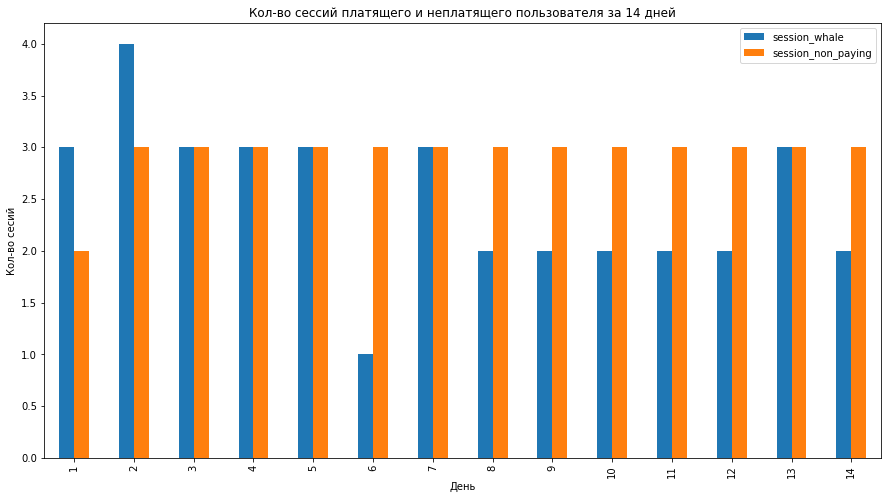

In [ ]:
sessions.plot(kind='bar',
              title='Кол-во сессий платящего и неплатящего пользователя за 14 дней',
              xlabel='День', 
              ylabel='Кол-во сесий')

# Кол-во сессий платящего и неплатящего пользователя за 14 дней в сумме

In [ ]:
dsw1 = epw[['day','session']]
dsw2 = dsw1.drop_duplicates().reset_index(drop=True)
dswmax = dsw2.groupby(['day']).max().reset_index()
dswmax.rename(columns={'session': 'session_whale'}, inplace=True)

In [ ]:
dsnp1 = epnp[['day','session']]
dsnp2 = dsnp1.drop_duplicates().reset_index(drop=True)
dsnpmax = dsnp2.groupby(['day']).max().reset_index()
dsnpmax.rename(columns={'session':'session_non_paying'},inplace=True)

In [ ]:
sessionsmax = dswmax.merge(dsnpmax,how='outer')
sessionsmax.set_index('day',inplace=True)

<AxesSubplot:title={'center':'Кол-во сессий платящего и неплатящего пользователя за 14 дней в сумме'}, xlabel='День', ylabel='Кол-во сесий'>

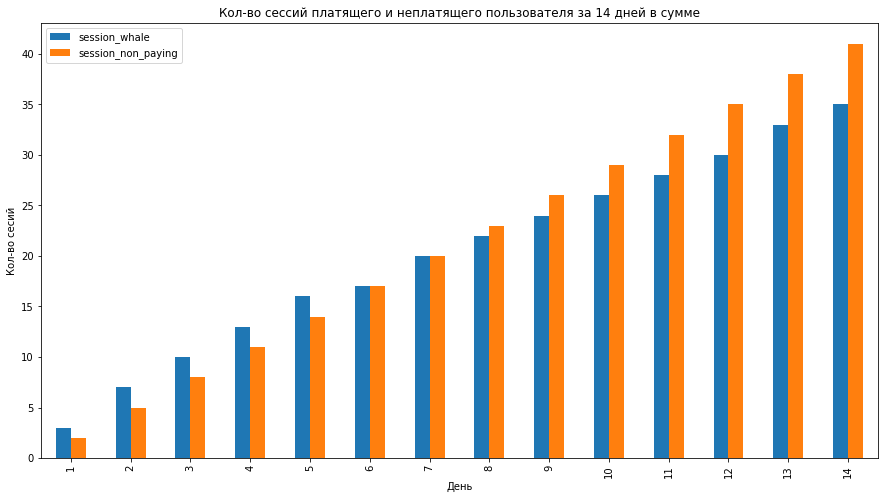

In [ ]:
sessionsmax.plot(kind='bar',
              title='Кол-во сессий платящего и неплатящего пользователя за 14 дней в сумме',
              xlabel='День', 
              ylabel='Кол-во сесий')

# Длина сесий в день платящего и неплатящего пользователя за 14 дней

In [ ]:
dvw1 = epw[['day','videolength']]
dvw = dvw1.drop_duplicates().reset_index(drop=True).groupby('day').sum().reset_index()
dvw.rename(columns={'videolength':'len_session_day_whale'},inplace=True)

In [ ]:
dvnp1 = epnp[['day','videolength']]
dvnp = dvnp1.drop_duplicates().reset_index(drop=True).groupby('day').sum().reset_index()
dvnp.rename(columns={'videolength':'len_session_day_non_paying'},inplace=True)

<AxesSubplot:title={'center':'Длина сесий в день платящего и неплатящего пользователя за 14 дней'}, xlabel='День', ylabel='Длина сесий в сек.'>

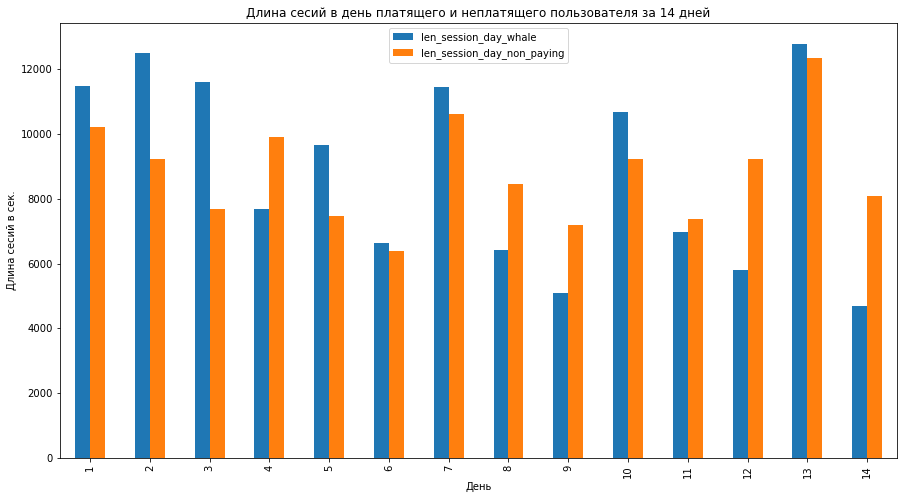

In [ ]:
len_session_d = dvw.merge(dvnp,how='outer')
len_session_d.set_index('day',inplace=True)
len_session_d.plot(kind='bar',title='Длина сесий в день платящего и неплатящего пользователя за 14 дней',
                   xlabel='День', 
                   ylabel='Длина сесий в сек.')

# Длина каждой сесий платящего и неплатящего пользователя

In [ ]:
dsvw1 = epw[['session','videolength']]
dsvw2 = dsvw1.drop_duplicates().reset_index(drop=True)
dsvw = dsvw2.groupby('session').sum().reset_index()
dsvw.rename(columns={'videolength':'len_session_whale'},inplace=True)

In [ ]:
dsvnp1 = epnp[['session','videolength']]
dsvnp2 = dsvnp1.drop_duplicates().reset_index(drop=True)
dsvnp = dsvnp2.groupby('session').sum().reset_index()
dsvnp.rename(columns={'videolength':'len_session_non_paying'},inplace=True)

In [ ]:
len_session = dsvw.merge(dsvnp,how='outer')
len_session.set_index('session',inplace=True)

<AxesSubplot:title={'center':'Длина каждой сесий платящего и неплатящего пользователя'}, xlabel='Сессия', ylabel='Длительность в сек.'>

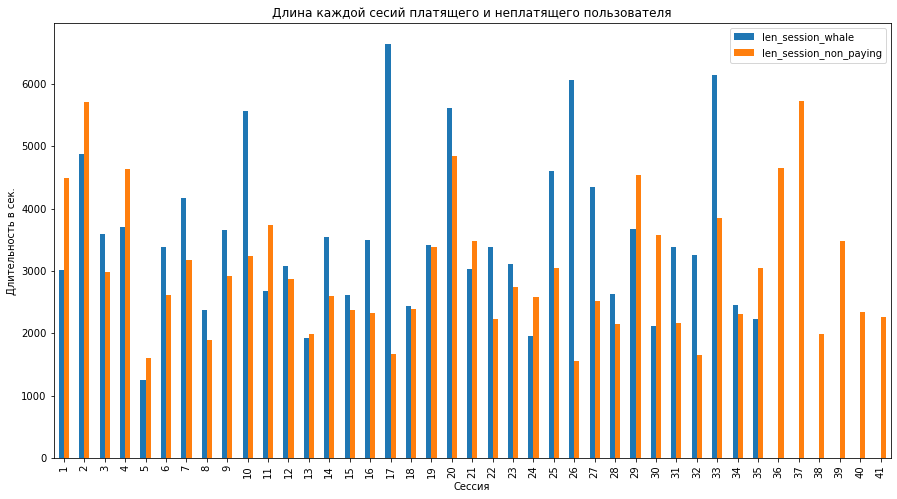

In [ ]:
len_session.plot(kind = 'bar',
                 title='Длина каждой сесий платящего и неплатящего пользователя',
                 xlabel='Сессия', 
                 ylabel='Длительность в сек.')

 # Средняя длина сесии платящего и не платящего пользователя

In [ ]:
dvwmean = dvw1.drop_duplicates().reset_index(drop=True).groupby('day').mean().reset_index()
dvwmean.rename(columns={'videolength':'len_session_mean_whale'},inplace=True)

In [ ]:
dvnpmean = dvnp1.drop_duplicates().reset_index(drop=True).groupby('day').mean().reset_index()
dvnpmean.rename(columns={'videolength':'len_session_mean_non_paying'},inplace=True)

In [ ]:
len_session_mean = dvwmean.merge(dvnpmean,how='outer')
len_session_mean.set_index('day',inplace=True)

<AxesSubplot:title={'center':'Средняя длина сесии платящего и не платящего пользователя'}, xlabel='День', ylabel='Длина сессии в сек.'>

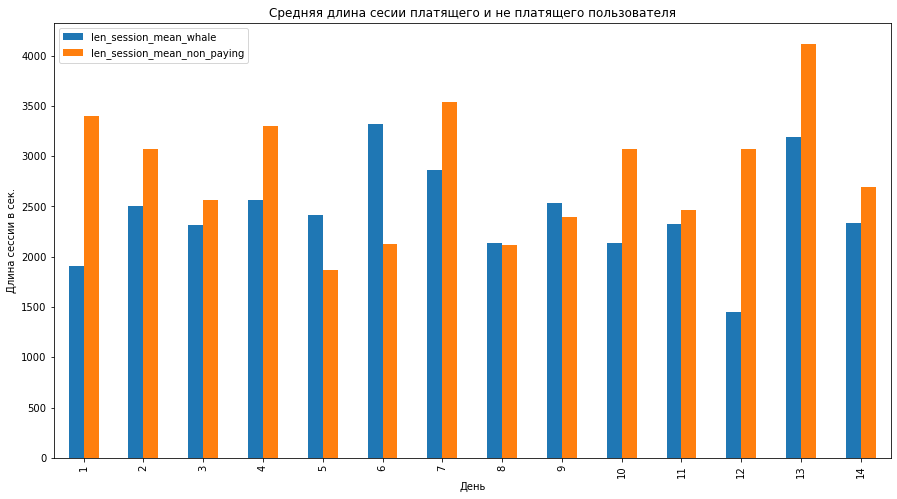

In [ ]:
len_session_mean.plot(kind = 'bar',
                 title='Средняя длина сесии платящего и не платящего пользователя',
                 xlabel='День', 
                 ylabel='Длина сессии в сек.')

# Время в игре с первого дня платящего и не платящего пользователя

In [ ]:
dvwsum = dvw1.drop_duplicates().reset_index(drop=True).groupby('day').sum().reset_index()
dvwsum.rename(columns={'videolength':'len_session_day_whale'},inplace=True)
dvwsum['len_session_day_whale'] = dvwsum['len_session_day_whale'].cumsum()

In [ ]:
dvnpsum = dvnp1.drop_duplicates().reset_index(drop=True).groupby('day').sum().reset_index()
dvnpsum.rename(columns={'videolength':'len_session_day_non_paying'},inplace=True)
dvnpsum['len_session_day_non_paying'] = dvnpsum['len_session_day_non_paying'].cumsum()

In [ ]:
len_session_sum = dvwsum.merge(dvnpsum,how='outer')
len_session_sum.set_index('day',inplace=True)

<AxesSubplot:title={'center':'Время в игре с первого дня платящего и не платящего пользователя'}, xlabel='День', ylabel='Время в сек.'>

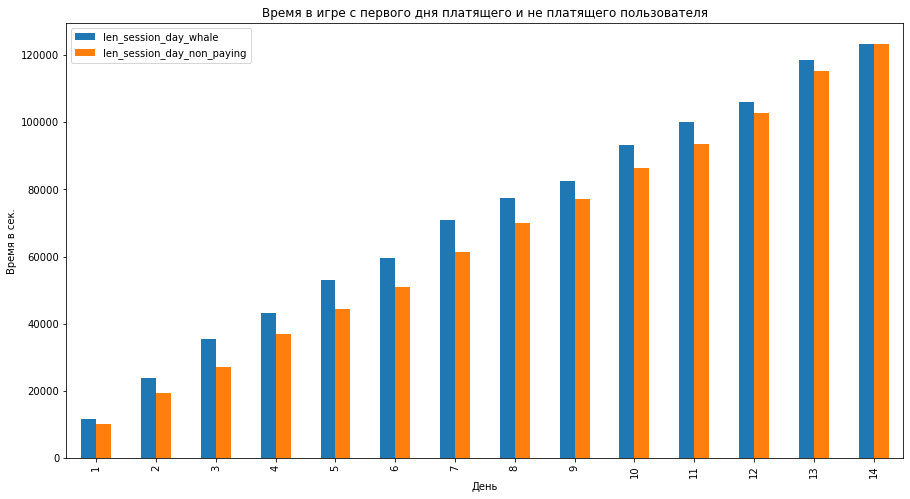

In [ ]:
len_session_sum.plot(kind = 'bar',
                 title='Время в игре с первого дня платящего и не платящего пользователя',
                 xlabel='День', 
                 ylabel='Время в сек.')

# Уровень пользователя в игре и уровень крепости

In [ ]:
levelw1 = epw[['day','player level','stronghold level']]
levelw = levelw1.drop_duplicates().reset_index(drop=True).groupby('day').max().reset_index()
levelw.rename(columns={'player level':'player_level_whale','stronghold level':'stronghold_level_whale'},inplace=True)

In [ ]:
levelnp1 = epnp[['day','player level','stronghold level']]
levelnp2 = levelnp1.drop_duplicates().reset_index(drop=True)

In [ ]:
# levelnp2['player level'].unique()

In [ ]:
levelnp2['player level'] = levelnp2['player level'].replace(' ',np.NaN)
levelnp2['player level'] = levelnp2['player level'].astype('Int64')

In [ ]:
levelnp = levelnp2.dropna().reset_index(drop=True).groupby('day').max().reset_index()
levelnp.rename(columns={'player level':'player_level_non_paying','stronghold level':'stronghold_level_non_paying'},
               inplace=True)

In [ ]:
level = levelw.merge(levelnp,how='outer')
level.set_index('day',inplace=True)

(0.0, 20.0)

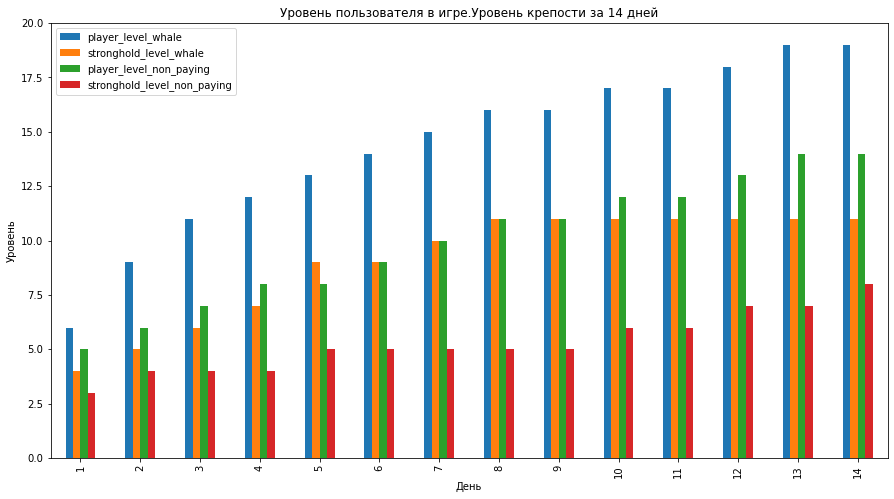

In [ ]:
level.plot(kind='bar',
            title='Уровень пользователя в игре.Уровень крепости за 14 дней',
            xlabel='День', 
            ylabel='Уровень')
plt.ylim(0, 20)

# Кол-во заработаных\преобретенных gems платящего и неплатящего пользователя за 14 дней

In [ ]:
gemsw1 = epw[['day','gems+']]
gemsw = gemsw1.drop_duplicates().reset_index(drop=True).groupby('day').sum().reset_index()
gemsw.rename(columns={'gems+':'gems+whale'},inplace=True)

In [ ]:
gemsnp1 = epnp[['day','gems+']]
gemsnp = gemsnp1.drop_duplicates().reset_index(drop=True).groupby('day').sum().reset_index()
gemsnp.rename(columns={'gems+':'gems+non_paying'},inplace=True)

In [ ]:
gems = gemsw.merge(gemsnp,how='outer')
gems.set_index('day',inplace=True)

<AxesSubplot:title={'center':'Кол-во заработаных\\преобретенных самоцветов платящего и неплатящего пользователя за 14 дней'}, xlabel='День', ylabel='Кол-во самоцветов'>

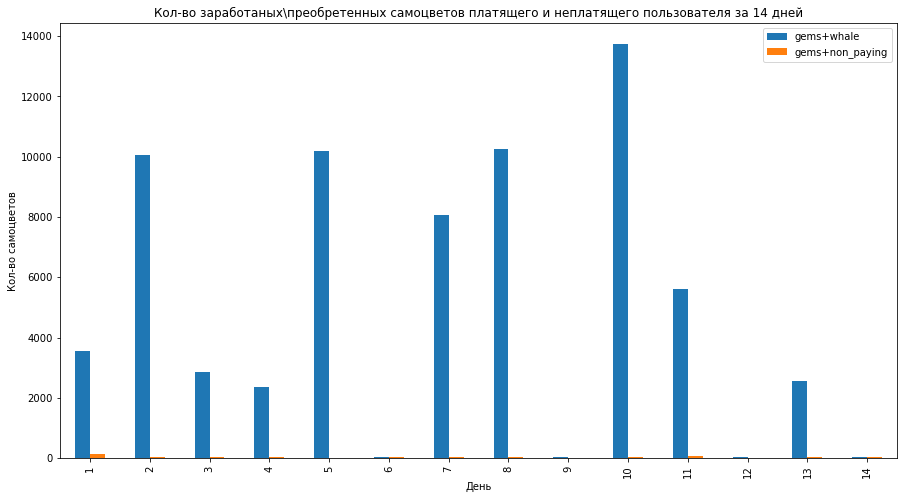

In [ ]:
gems.plot(kind='bar',title='Кол-во заработаных\преобретенных самоцветов платящего и неплатящего пользователя за 14 дней',
              xlabel='День', 
              ylabel='Кол-во самоцветов')

# Самоцветов на балансе платящего и неплатящего пользователя за 14 дней

In [ ]:
gemsw1 = epw[['day','gems balance']]
gemswmax = gemsw1.drop_duplicates().reset_index(drop=True).groupby('day').max().reset_index()
gemswmax.rename(columns={'gems balance':'gems balance_whale'},inplace=True)

In [ ]:
gemsnp1 = epnp[['day','gems balance']]
gemsnpmax = gemsnp1.drop_duplicates().reset_index(drop=True).groupby('day').max().reset_index()
gemsnpmax.rename(columns={'gems balance':'gems balance_non_paying'},inplace=True)

In [ ]:
gemsmax = gemswmax.merge(gemsnpmax,how='outer')
gemsmax.set_index('day',inplace=True)

<AxesSubplot:title={'center':'Самоцветов на балансе платящего и неплатящего пользователя за 14 дней'}, xlabel='День', ylabel='Кол-во самоцветов'>

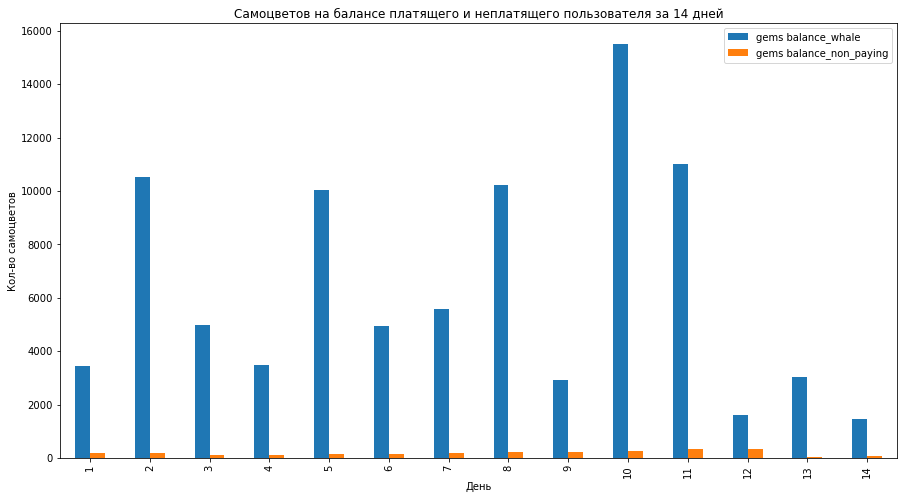

In [ ]:
gemsmax.plot(kind='bar',title='Самоцветов на балансе платящего и неплатящего пользователя за 14 дней',
              xlabel='День', 
              ylabel='Кол-во самоцветов')

 # Сила команды платящего и не платящего пользователя за 14 дней

In [ ]:
tpw = epw1[['day','team power']]
tpw = tpw.drop_duplicates().reset_index(drop=True).groupby('day').max().reset_index()
tpw.rename(columns={'team power':'team power_whale'},inplace=True)

In [ ]:
tpnp = epnp1[['day','team power']]
tpnp = tpnp.drop_duplicates().reset_index(drop=True).groupby('day').max().reset_index()
tpnp.rename(columns={'team power':'team power_non_paying'},inplace=True)

In [ ]:
team_power = tpw.merge(tpnp,how='outer')
team_power.set_index('day',inplace=True)

<AxesSubplot:title={'center':'Сила команды платящего и не платящего пользователя за 14 дней'}, xlabel='День', ylabel='Сила команды'>

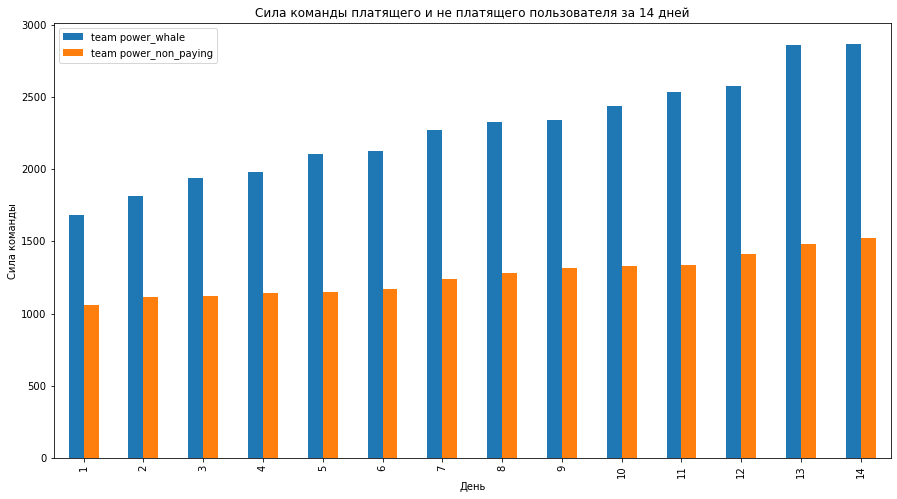

In [ ]:
team_power.plot(kind='bar',
            title='Сила команды платящего и не платящего пользователя за 14 дней',
            xlabel='День', 
            ylabel='Сила команды')

# Сила команды платящего и не платящего пользователя за каждую сессию

In [ ]:
tpws = epw1[['session','team power']]
tpws = tpws.drop_duplicates().reset_index(drop=True).groupby('session').max().reset_index()
tpws.rename(columns={'team power':'team power_whale'},inplace=True)

In [ ]:
tpnps = epnp1[['session','team power']]
tpnps = tpnps.drop_duplicates().reset_index(drop=True).groupby('session').max().reset_index()
tpnps.rename(columns={'team power':'team power_non_paying'},inplace=True)

In [ ]:
team_power_s = tpws.merge(tpnps,how='outer')
team_power_s.set_index('session',inplace=True)

<AxesSubplot:title={'center':'Сила команды платящего и не платящего пользователя за каждую сессию'}, xlabel='Сессия', ylabel='Сила команды'>

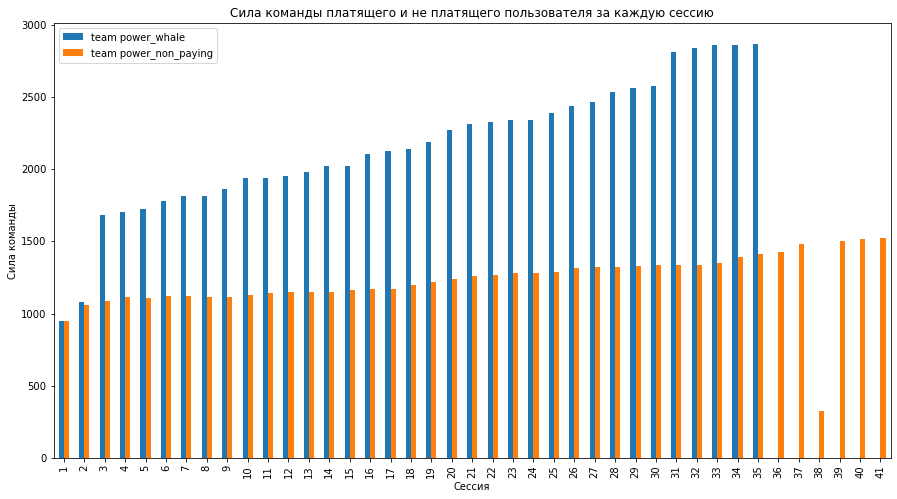

In [ ]:
team_power_s.plot(kind='bar',
            title='Сила команды платящего и не платящего пользователя за каждую сессию',
            xlabel='Сессия', 
            ylabel='Сила команды')